In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
get_ipython().run_line_magic('matplotlib', 'inline')


In [64]:
#read the data
state_crime = pd.read_csv("../../data/modified-data/cleaned_state_crime_record_data.csv")
state_crime.head()

,State,Year,Population,Property_Crime_Rate,Property_Burglary_Rate,Property_Larceny_Rate,Property_Motor_Rate,Violent_Crime_Rate,Violent_Assault_Rate,Violent_Murder_Rate,Violent_Rape_Rate,Violent_Robbery_Rate
0,Alabama,1960,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,8.6,27.5
1,Alabama,1961,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,7.6,19.1
2,Alabama,1962,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,6.5,22.5
3,Alabama,1963,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,10.2,5.7,24.7
4,Alabama,1964,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,9.3,11.7,29.1


In [65]:
#create new column
state_crime['Violent_label'] = state_crime[['Violent_Assault_Rate', 'Violent_Murder_Rate','Violent_Rape_Rate','Violent_Robbery_Rate']].idxmax(axis=1)

In [66]:
##import packages 

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.utils import resample

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from wordcloud import WordCloud, STOPWORDS
from sklearn import preprocessing   

In [67]:
#create table for only property crime datasets
violent_df = state_crime[['Violent_Assault_Rate', 'Violent_Murder_Rate','Violent_Rape_Rate','Violent_Robbery_Rate','Violent_label']].copy()

In [68]:
x = violent_df.drop('Violent_label', axis =1)
y = violent_df['Violent_label']
#split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [69]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [70]:
#predict the test data
#Evaluate the model:
print("Training set score: %f" % nb.score(x_train, y_train))
print("Test set score: %f" % nb.score(x_test, y_test))


Training set score: 0.910465
Test set score: 0.929487


<BarContainer object of 2 artists>

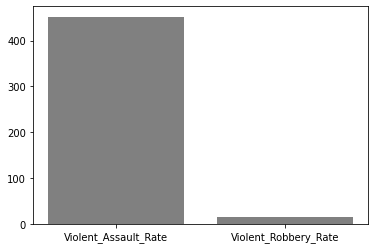

In [71]:
# Predicting the Test set results
y_pred = nb.predict(x_test)
unique, count = np.unique(y_pred, return_counts=True)
plt.bar(unique, count, color = 'grey')



                      precision    recall  f1-score   support

Violent_Assault_Rate       0.93      0.99      0.96       425
Violent_Robbery_Rate       0.81      0.30      0.44        43

            accuracy                           0.93       468
           macro avg       0.87      0.65      0.70       468
        weighted avg       0.92      0.93      0.91       468



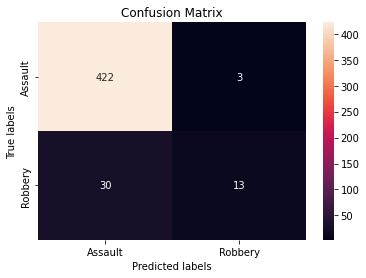

In [72]:
print(metrics.classification_report(y_test, y_pred))
##Visualise Confusion Matrix
labels = ['Assault','Robbery']
ax1=plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', ax=ax1)
# labels, title and ticks
ax1.set_xlabel('Predicted labels');ax1.set_ylabel('True labels')
ax1.set_title('Confusion Matrix'); 
ax1.xaxis.set_ticklabels(labels); ax1.yaxis.set_ticklabels(labels)
plt.show()
plt.close()